#### Import libraries:

In [182]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Runing the script:

In [183]:
from PorousMediaLab import PorousMediaLab
import numpy as np

#### Setting up the properties of the time-space and create the domain:

In [184]:
t = 27 / 365
dx = 0.2
L = 40
phi = 0.4
dt = 1e-5
ftc = PorousMediaLab(L, dx, t, dt, phi)

#### Simulate Temperature? Yes,  initial temperature 5C:

In [185]:
ftc.add_temperature(init_temperature=5)

#### To make things interesting lets create not simple inital conditions for iron:

In [186]:
# Not simple initial concentration of solid iron:
x = np.linspace(0, L, L / dx + 1)
Fe3_init = np.zeros(x.size)
Fe3_init[x > 5] = 75
Fe3_init[x > 15] = 0
Fe3_init[x > 25] = 75
Fe3_init[x > 35] = 0

#### Adding species with names, diffusion coefficients, initial concentrations and boundary top and bottom conditions:

In [187]:
ftc.add_species(is_solute=True, element='O2', D=368, init_C=0, bc_top=0.231, bc_top_type='dirichlet', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='CO2', D=320, init_C=0, bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=True, element='Fe2', D=127, init_C=0, bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')
ftc.add_species(is_solute=False, element='OM', D=5, init_C=15, bc_top=0, bc_top_type='flux', bc_bot=0, bc_bot_type='flux')
ftc.add_solid_species('FeOH3', 5, Fe3_init, 0)

#### ODEs for specific species:

In [188]:
ftc.dcdt['OM'] = '-R1-R2'
ftc.dcdt['O2'] = '-R1-R8'
ftc.dcdt['FeOH3'] = '-4*R2+R8'
ftc.dcdt['Fe2'] = '-R8+4*R2'
ftc.dcdt['CO2'] = 'R1+R2'

#### Specify the equations for rates:

In [189]:
ftc.rates['R1'] = 'Q10**((Temperature-5)/10) * k_OM * OM * O2 / (Km_O2 + O2)'
ftc.rates['R2'] = 'Q10**((Temperature-5)/10) * k_OM * OM * FeOH3 / (Km_FeOH3 + FeOH3) * Km_O2 / (Km_O2 + O2)'
ftc.rates['R8'] = 'k8 * O2 * Fe2'

#### Specify the constants used in the rates:

In [190]:
ftc.constants['Q10'] = 4
ftc.constants['k_OM'] = 1
ftc.constants['Km_O2'] = 20e-3
ftc.constants['Km_FeOH3'] = 10
ftc.constants['k8'] = 1.4e+5

#### Run the model

In [191]:
ftc.solve()

Simulation starts  with following params:
	tend = 0.1 years,
	dt = 1.00e-05 years,
	L = 40.0,
	dx = 2.00e-01,
	w = 0.00
Simulation started:
	 2017-03-07 17:06:54


Estimated time of the code execution:
	 0h:00m:22s
Will finish approx.:
	 2017-03-07 17:07:16


#### Because we are changing the boundary conditions for temperature and Oxygen (when T < 0 => no oxygen at the top), then we need to have a time loop:

In [192]:
# for i in range(1, len(ftc.time)):
#     day_of_bi_week = (ftc.time[i]*365) % 14
#     if day_of_bi_week < 7:
#         ftc.Temperature.bc_top = 5  + 5 * np.sin(np.pi * 2 * ftc.time[i] * 365)
#     else:
#         ftc.Temperature.bc_top = -10  + 5 * np.sin(np.pi * 2 * ftc.time[i] * 365)
        
#     # when T < 0 => no oxygen at the top:
#     if ftc.Temperature.bc_top < 0:
#         ftc.O2.bc_top = 0
#         ftc.CO2.bc_top = 0
#     else:
#         ftc.O2.bc_top = 0.231
#         C_top = ftc.CO2.concentration[0,i-1]
#         ftc.CO2.bc_top = - phi * (C_top ) / dx * 320
        
#     # Integrate one timestep:
#     ftc.integrate_one_timestep(i)

### Concentrations of different species during the whole period of simulation:

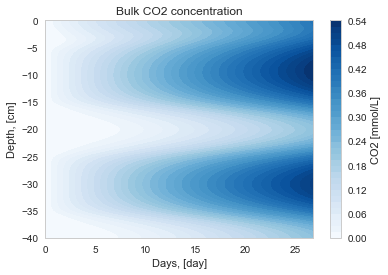

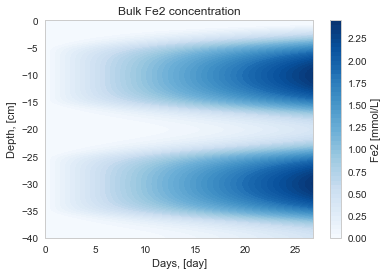

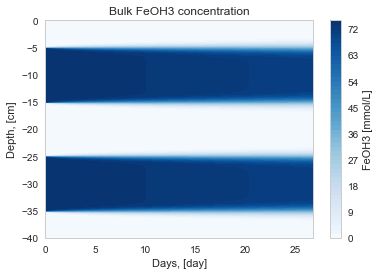

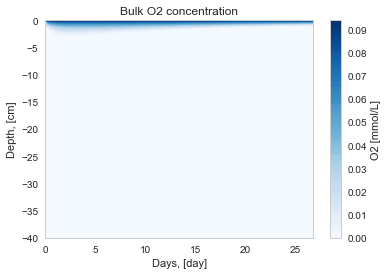

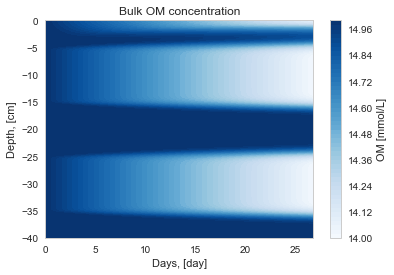

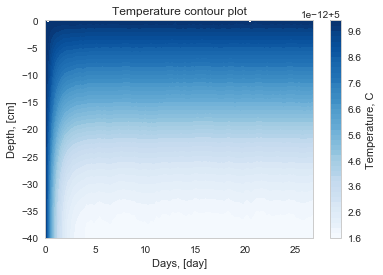

In [193]:
ftc.plot_contourplots()

### The rates of consumption and production of species:

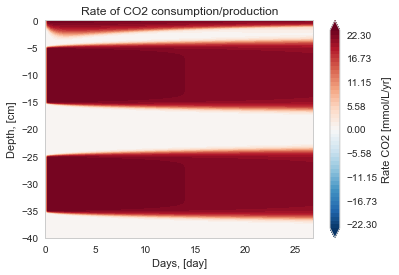

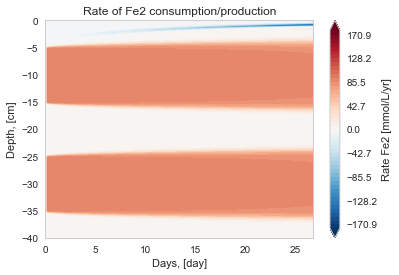

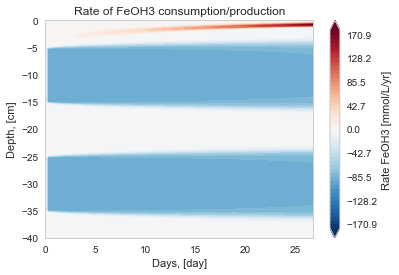

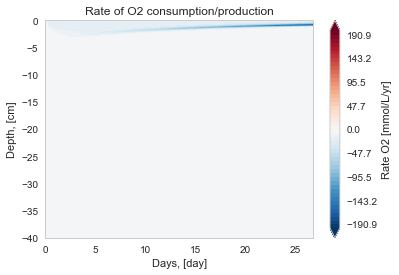

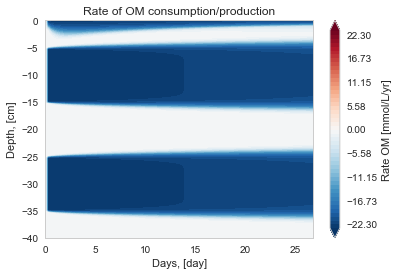

In [194]:
ftc.plot_contourplots_of_rates()

### Temperature timeseries at diferent depths:

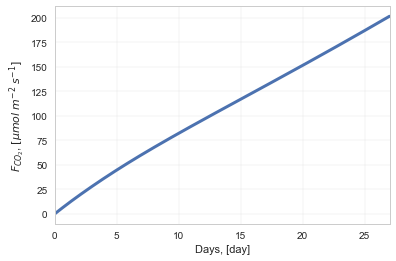

In [195]:
C_top = ftc.CO2.concentration[0,:]
Fx = phi * (C_top) / dx * 320
ftc.custom_plot(ftc.time*365, 10**3*10**4/(60*60*24*365)*(ftc.Temperature.concentration[0,:] > 0)*Fx,x_lbl='Days, [day]' , y_lbl='$F_{CO_2}$, $[\mu mol$ $m^{-2}$ $s^{-1}]$')

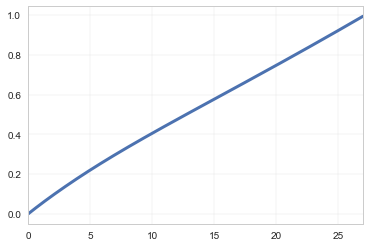

In [196]:
ftc.custom_plot(ftc.time*365, C_top)

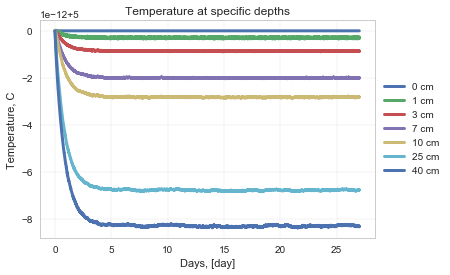

In [197]:
ftc.plot_depths("Temperature",[0,1,3,7,10,25,40])

### Temperatrure profiles during Freezing and Thawing cycles:

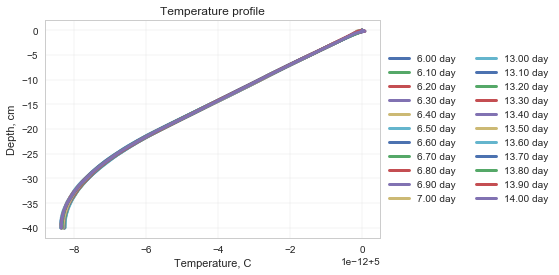

In [198]:
t1 = np.linspace(6,7,11)/365
# tt = np.linspace(7,8,11)/365
t2 = np.linspace(13,14,11)/365
times = np.concatenate((t1, t2))
ftc.plot_times('Temperature', times)

### Profiles at the end of the simulation

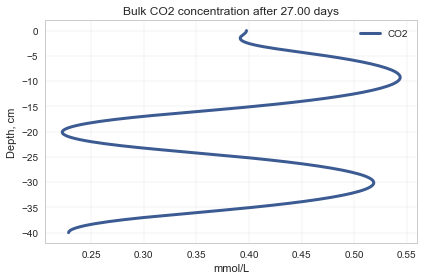

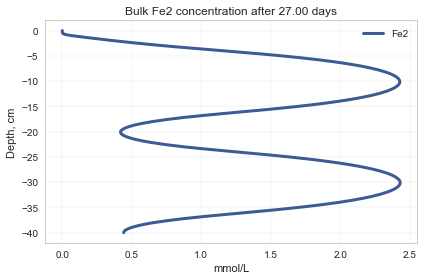

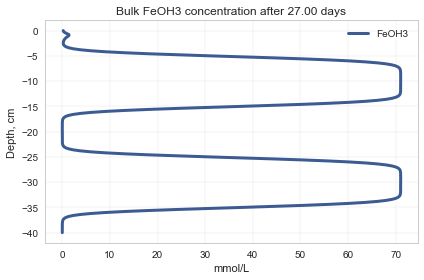

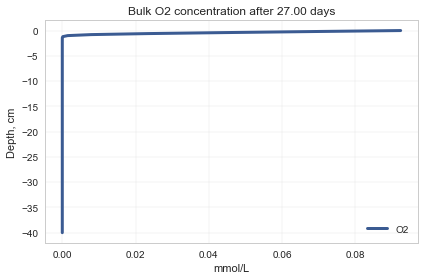

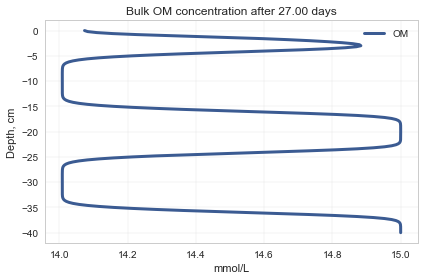

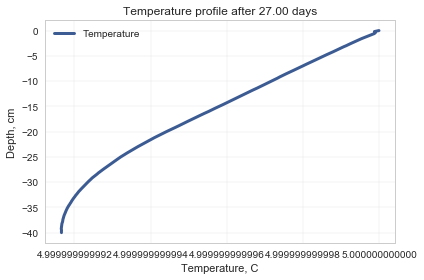

In [199]:
ftc.plot_profiles()